<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_clessify_flowers_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [3]:
folder = '/content/drive/MyDrive/Data_CNN/flowers'
food = ['daisy', 'iris', 'rose', 'tulip', 'water_lily']
photos, lables = list(), list()
for i in range (5):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos = asarray(photos)
lables = asarray(lables)

In [4]:
print(photos.shape)
print(lables.shape)

(1000, 200, 200, 3)
(1000,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(photos), np.array(lables), test_size=0.2)

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)


In [25]:
train_X = X_train.astype('float32')/255
test_X = X_test.astype('float32')/255

[0. 0. 0. 1. 0.]
(200, 200, 3)


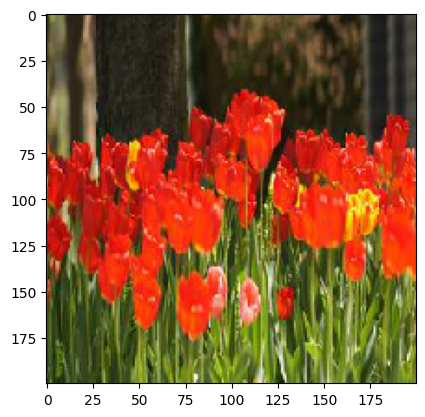

In [32]:
plt.imshow(train_X[500])
print(y_train[500])
print(test_X[5].shape)

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [12]:
batch_size = 64
epochs = 10
classes = 5

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (200,200,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [27]:
train = model.fit(train_X, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/10
13/13 [==============================] - 1s 100ms/step - loss: 4.9232e-04 - accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 1s 97ms/step - loss: 4.2023e-04 - accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 1s 98ms/step - loss: 3.3977e-04 - accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 1s 99ms/step - loss: 2.9885e-04 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 1s 99ms/step - loss: 2.6459e-04 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 1s 99ms/step - loss: 2.3899e-04 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 1s 100ms/step - loss: 2.1801e-04 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 1s 101ms/step - loss: 1.9980e-04 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 1s 104ms/step - loss: 1.8445e-04 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 1s 105ms/step - 

In [43]:
model.evaluate(train_X, y_train)

25/25 [==============================] - 1s 27ms/step - loss: 1.6302e-04 - accuracy: 1.0000


[0.0001630214974284172, 1.0]

1/1 [==============================] - 0s 24ms/step
water_lily
water_lily


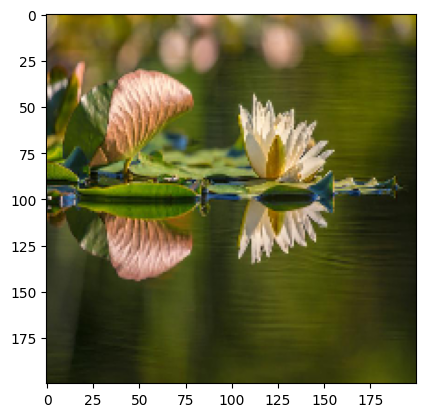

In [47]:
n = 15
plt.imshow(train_X[n])
pred = model.predict(train_X[n].reshape((1, 200, 200,3)))
print(food[pred.argmax()])
print(food[y_train[n].argmax()])